# Сборный проект - Анализ продаж компьютерных игр
**Цель:** Выявить параметры, определяющие успешность игр, для дальнейшего управления продуктами (определение перспективных / стагнирующих сфер, распределение рекламных бюджетов, текущая / перспективная популярность).

**Выборка:** Исторические данные о выпущенных играх с продажами по регионам. Данные за 2016 год могут быть не полными.

### Описание данных
    
    - *Name* — название игры
    - *Platform* — платформа
    - *Year_of_Release* — год выпуска
    - *Genre* — жанр игры
    - *NA_sales —* продажи в Северной Америке (миллионы долларов)
    - *EU_sales* — продажи в Европе (миллионы долларов)
    - *JP_sales* — продажи в Японии (миллионы долларов)
    - *Other_sales —* продажи в других странах (миллионы долларов)
    - *Critic_Score* — оценка критиков (от 0 до 100)
    - *User_Score* — оценка пользователей (от 0 до 10)
    - *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
    Данные за 2016 год могут быть неполными.

### Описание проекта

- 
    
    Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
    Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
    
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st

In [2]:
games = pd.read_csv(r'/datasets/games.csv')

## Предобработка данных

In [3]:
def first_look(df):
    print('---------------------------Первые 5 строк----------------------------')
    display(df.head())
    print(' ')
    print(' ')
    print('--------------Общая информация--------------')
    print(' ')
    print(df.info())
    print(' ')
    print('-------------Пропуски------------- ')
    print(' ')
    count=0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
    if count == 0:
        print(' ')
        print('Пропусков НЕТ')
    print(' ')
    print('-------------Дубликаты------------ ')
    print(' ')
    if df.duplicated().sum() > 0:
        print(' ')
        print('Дубликатов: ', df.duplicated().sum())
    else:
                print('Дубликатов НЕТ')
    print(' ')   

In [4]:
first_look(games)

---------------------------Первые 5 строк----------------------------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


 
 
--------------Общая информация--------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
 
-------------Пропуски------------- 
 
Name  -  2 пропусков
Year_of_Release  -  269 пропусков
Genre  -  2 пропусков
Critic_Score  -  8578 пропусков
User_Score  -  6701 пропусков
Rating

In [5]:
for col in games.columns:
    pct_missing = np.mean(games[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
NA_sales - 0%
EU_sales - 0%
JP_sales - 0%
Other_sales - 0%
Critic_Score - 51%
User_Score - 40%
Rating - 40%


In [6]:
games.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
Platform,0.00%
NA_sales,0.00%
EU_sales,0.00%
JP_sales,0.00%
Other_sales,0.00%
Name,0.01%
Genre,0.01%
Year_of_Release,1.61%
User_Score,40.09%
Rating,40.48%


**Заменим названия столбцов, преобразуем данные в нужные типы и обработаем пропуски**

In [7]:
games.columns = games.columns.str.lower()

### Столбец **name**

In [8]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


 Название мы не сможем заменить, удалим пропуски поскольку их всего 2.

In [9]:
games = games.dropna(subset = ['name'])

### Столбец **year_of_release**

Год выпуска мы восстановить не сможем, для экономии времени удаляем 269 значений. Поскольку в дате указан только год переведём в int.

In [10]:
games = games.dropna(subset = ['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Столбецы  **user_score**, **critic_score** и **rating**

In [11]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В user_score, rating и critic_score примерно одинаково много пропусков. Пропуски не только в старых играх, но и в достаточно свежих. Пропусков слишком много, чтобы удалять.

В user_score есть, как числовые данные, так и 'tbd' - "To Be Determined". Узнаем сколько tbd.

In [12]:
len(games[games['user_score'] == 'tbd'])/len(games)

0.14449039163220628

14,5% - много. Так как в данных int и object медиану определить не сможем. Оставляем, как есть.

In [13]:
games['rating'] = games['rating'].fillna('Unknown')
games['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

In [14]:
games['user_score'] = pd.to_numeric(games['user_score'], downcast='float', errors ='coerce')
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7], dtype=float32)

In [15]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
games['critic_score'].astype(float) 
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Добавим столбец суммарных продаж во всех регионах

In [17]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


**Итоги предобработки данных**

На этапе предобработки данных мы очистили 11 столбцов. Пока оставили пропуски и 'tbd'(когда придется производить вычисления по этим стобцам, то будем разбирать их отдельно). Привели столбцы к нужным нам типам, названия к нижнему регистру и добавили столбец "total_sales", в котором посчитали суммарные продажи по всем регионам.

## Проведём исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

- Ответим на вопрос: важны ли данные за все периоды.

<function matplotlib.pyplot.show(close=None, block=None)>

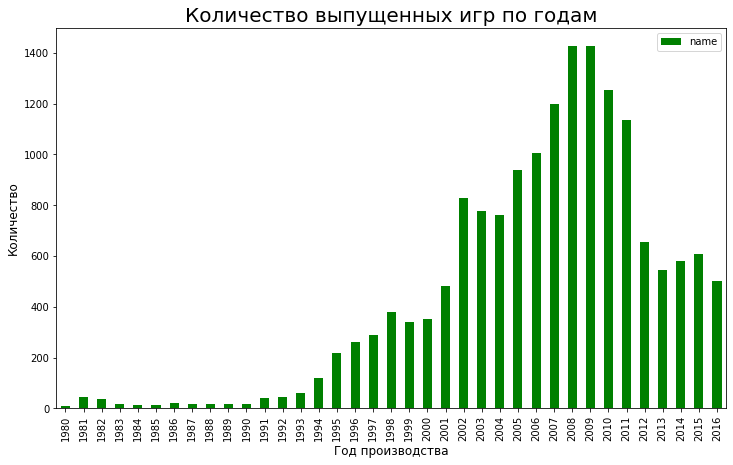

In [19]:
basa_sales = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
basa_sales.plot(kind='bar', figsize=(12,7), color = 'green')
plt.title('Количество выпущенных игр по годам', fontsize=20)
plt.xlabel('Год производства', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show

В период с 1980 по 1994 год производилось немного игр, в связи с небольшим количеством разработчиков и пользователей. После 1994 пошёл рост производства, который вышел на пики в 2002 и 2008 гг. Спад производства начался в 2012 году, что можно объяснить заменой количества на качество. Разработчики стали объединяться в крупные компании для выхода на новый уровень и создания более реалистичных игр.  

### Посмотрим, как менялись продажи по платформам

- Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
- Определим за какой характерный срок появляются новые и исчезают старые платформы.

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


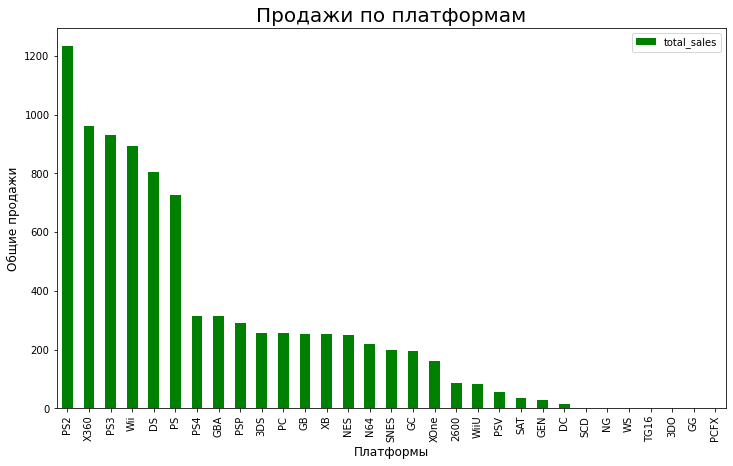

In [20]:
platform_sales_pivot_table = pd.pivot_table(games, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('total_sales',ascending=False)
platform_sales_pivot_table.plot(kind='bar', figsize=(12,7), color = 'green')
plt.title('Продажи по платформам', fontsize=20)
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Общие продажи', fontsize=12)
plt.show
platform_sales_pivot_table

In [21]:
best_sales_platform = list(platform_sales_pivot_table.index[:6])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

------------------------------
 
Платформа PS2


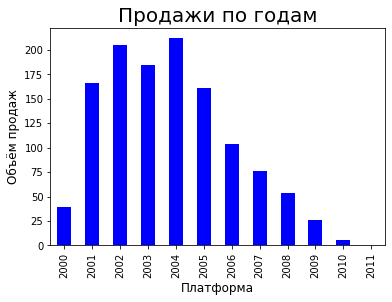

                 total_sales
year_of_release             
2000                   39.17
2001                  166.43
2002                  205.38
2003                  184.31
2004                  211.81
2005                  160.66
2006                  103.42
2007                   75.99
2008                   53.90
2009                   26.40
2010                    5.64
2011                    0.45
------------------------------
 
Платформа X360


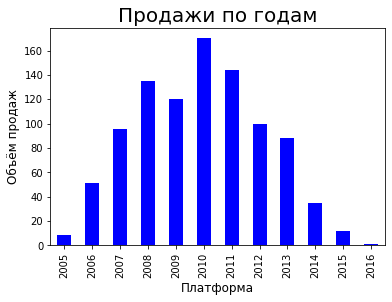

                 total_sales
year_of_release             
2005                    8.25
2006                   51.62
2007                   95.41
2008                  135.26
2009                  120.29
2010                  170.03
2011                  143.84
2012                   99.74
2013                   88.58
2014                   34.74
2015                   11.96
2016                    1.52
------------------------------
 
Платформа PS3


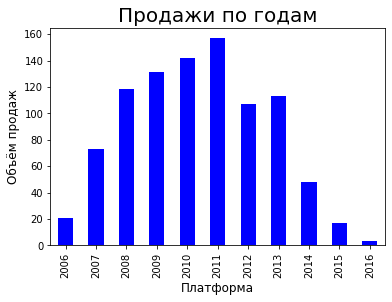

                 total_sales
year_of_release             
2006                   20.96
2007                   73.19
2008                  118.52
2009                  130.93
2010                  142.17
2011                  156.78
2012                  107.36
2013                  113.25
2014                   47.76
2015                   16.82
2016                    3.60
------------------------------
 
Платформа Wii


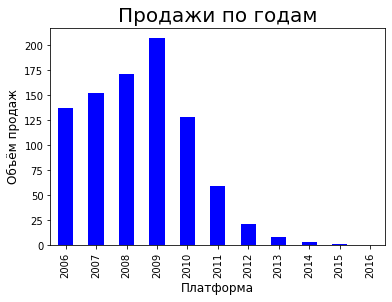

                 total_sales
year_of_release             
2006                  137.15
2007                  152.77
2008                  171.32
2009                  206.97
2010                  127.95
2011                   59.65
2012                   21.71
2013                    8.59
2014                    3.75
2015                    1.14
2016                    0.18
------------------------------
 
Платформа DS


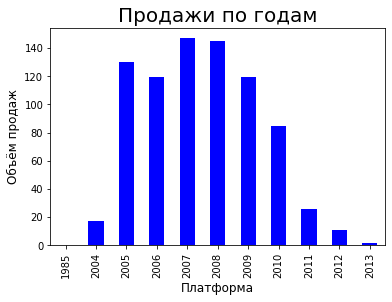

                 total_sales
year_of_release             
1985                    0.02
2004                   17.27
2005                  130.14
2006                  119.81
2007                  146.94
2008                  145.31
2009                  119.54
2010                   85.02
2011                   26.18
2012                   11.01
2013                    1.54
------------------------------
 
Платформа PS


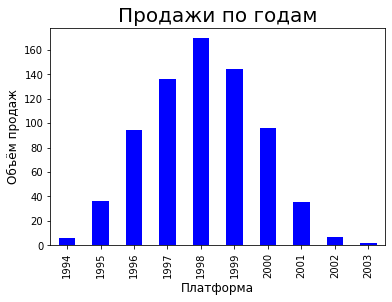

                 total_sales
year_of_release             
1994                    6.03
1995                   35.96
1996                   94.70
1997                  136.17
1998                  169.49
1999                  144.53
2000                   96.37
2001                   35.59
2002                    6.67
2003                    2.07


In [22]:
for platform in best_sales_platform:
    print('------------------------------')
    print(' ')
    print('Платформа',platform)
    platform_sales_pivot_table = pd.pivot_table(games.query('platform == @platform'), index='year_of_release', values='total_sales', aggfunc='sum')
    platform_sales_pivot_table.plot(kind='bar', figsize=(6,4), color = 'blue', legend=None)
    plt.title('Продажи по годам', fontsize=20)
    plt.xlabel('Платформа', fontsize=12)
    plt.ylabel('Объём продаж', fontsize=12)
    plt.show()
    print(platform_sales_pivot_table)


In [23]:
ds = games[games['platform'] == "DS"]
ds[ds['year_of_release'] == 1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


- **PS2** - появилась на рынке в 2000 году. В 2001 начинается рост продаж игр для PS2, в 2004 достигает пика и продажи идут на               спад до 2006. С 2007-2011 этап угасания продаж.
- **X360** - появилась на рынке в 2005 году. С 2006-2010 рост продаж игр. С 2012-2016 - этап угасания продаж.
- **PS3** - появилась на рынке в 2006 году. С 2007-2011 рост продаж игр. С 2012-2016 - этап угасания продаж.
- **Wii** - появилась на рынке в 2006 году. С 2006-2009 рост продаж игр. С 2010-2015 - этап угасания продаж.
- **PS** - появилась на рынке в 1994 году. С 1995-1998 рост продаж игр. С 1999-2003 - этап угасания продаж.
- **DS** - карманная консоль появилась на рынке в 1985 году, но не завоевала успеха. Второе рождение произошло в 2004. С 2005-              2007 рост продаж игр. С 2008-2013 - этап угасания продаж.
- **Срок жизни топовой консоли 10-12 лет**

### Возьмём данные за соответствующий актуальный период

- **Поскольку технологии быстро развиваются, возьмём минимальный период 2014-2016**

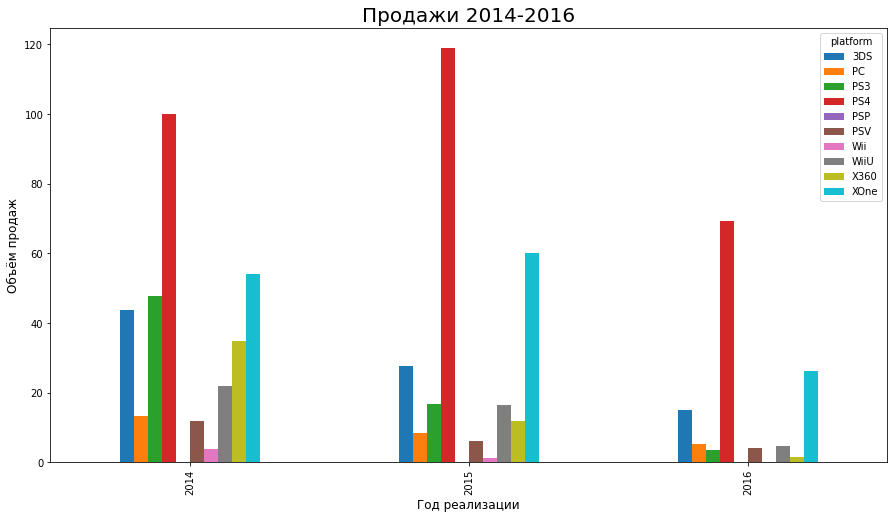

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [41]:
actual_games = games.query('year_of_release >= 2014')
leader_sales = pd.pivot_table(actual_games, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
leader_sales.plot(kind='bar', figsize=(15,8))
plt.title('Продажи 2014-2016', fontsize=20)
plt.xlabel('Год реализации', fontsize=12)
plt.ylabel('Объём продаж', fontsize=12)
plt.show()
leader_sales

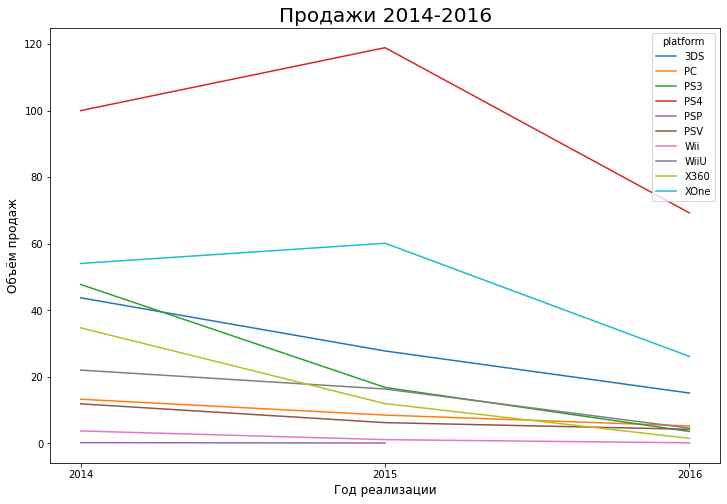

In [62]:
# код ревьюера

leader_sales.plot(kind='line', figsize=(12,8))
plt.title('Продажи 2014-2016', fontsize=20)
plt.xlabel('Год реализации', fontsize=12)
plt.ylabel('Объём продаж', fontsize=12)
plt.xticks(leader_sales.index)
plt.show()

In [25]:
leader_sales = pd.pivot_table(actual_games, index=['platform'], values='total_sales', aggfunc='sum')
leader_sales.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Пятёрка лидеров по продажам 2014-2016 - **PS4**, **XOne**, **3DS**, **PS3**, **X360**. На 2016 год продажи по всем платформам падают.На **PS4** и **XOne** в 2015 году наблюдался рост продаж, т.к. это относительно новые консоли. 

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

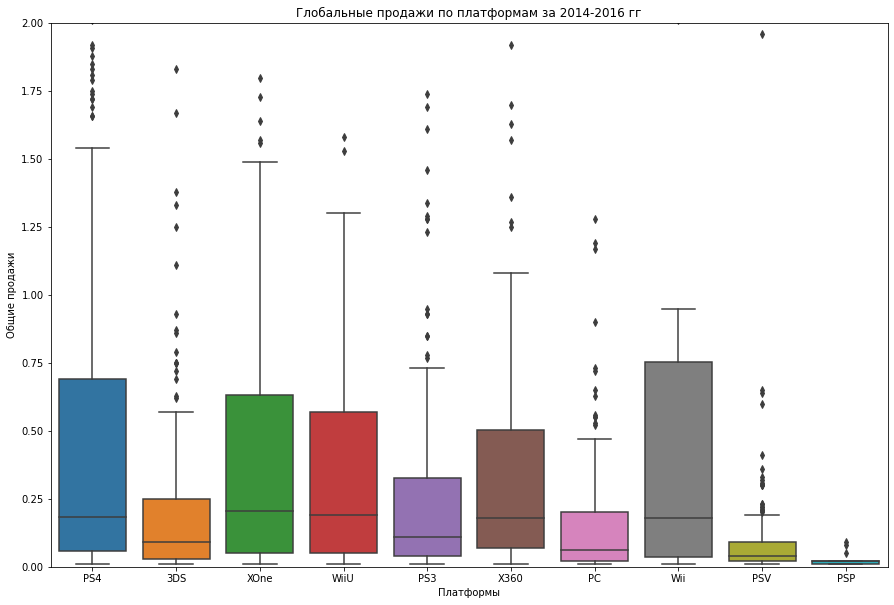

In [26]:
plt.figure(figsize=(15,10))
(sns.boxplot(data = actual_games, x='platform',y = 'total_sales')
    .set(title = 'Глобальные продажи по платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0,2)))

plt.show()

- За указанный период самые низкие минимальные продажи у платформ **PSP** и **PSV**. На удивление самое большое минимальное  количество продаж у **Wii** - платформы, которая находится в аутсайдерах. Также у **Wii** самый высокий потолок боксплота. 
- **PS4**, **XOne** и **WiiU** - тройка лидеров по продажам в мире.

### Проанализируем  влияние отзывов пользователей и критиков на платформу **PS4**

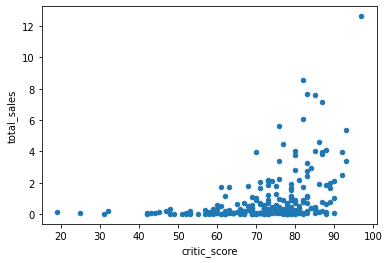

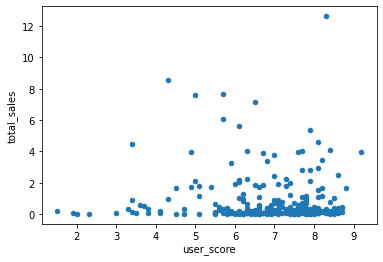

critic_score    0.402661
user_score     -0.040132
total_sales     1.000000
Name: total_sales, dtype: float64


In [27]:
best_platform = actual_games.query('platform == "PS4"')
best_platform.plot(kind='scatter', x='critic_score', y='total_sales')
best_platform.plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

print(best_platform[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

- Отзывы критиков незначительно влияют на продажи игр для **PS4**
- Продажи игр для **PS4** практически не зависят от оценок пользователей 

### Соотнесём выводы по **PS4** с другими платформами

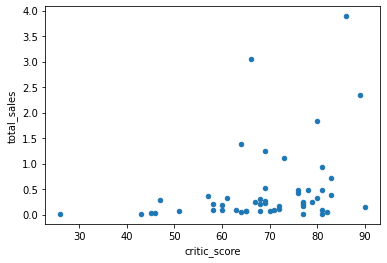

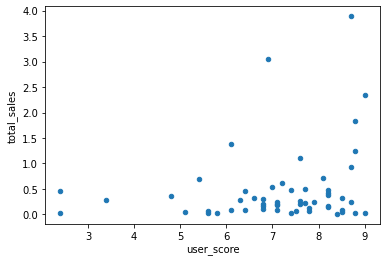

critic_score    0.314117
user_score      0.215193
total_sales     1.000000
Name: total_sales, dtype: float64


In [28]:
best_platform = actual_games.query('platform == "3DS"')
best_platform.plot(kind='scatter', x='critic_score', y='total_sales')
best_platform.plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
print(best_platform[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

- Отзывы критиков незначительно влияют на продажи игр для **3DS**
- Продажи игр для **3DS** не зависят от оценок пользователей 

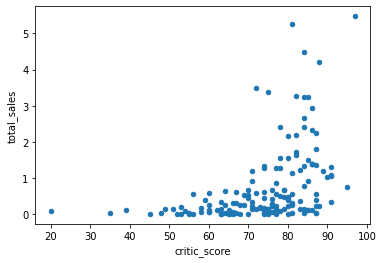

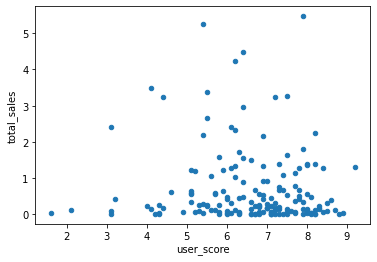

critic_score    0.428677
user_score     -0.070384
total_sales     1.000000
Name: total_sales, dtype: float64


In [29]:
best_platform = actual_games.query('platform == "XOne"')
best_platform.plot(kind='scatter', x='critic_score', y='total_sales')
best_platform.plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
print(best_platform[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

- **XOne** является прямым конкурентом **PS4** и корреляция у них практически одинаковая

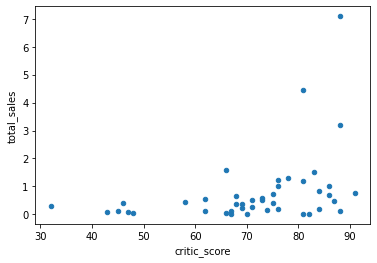

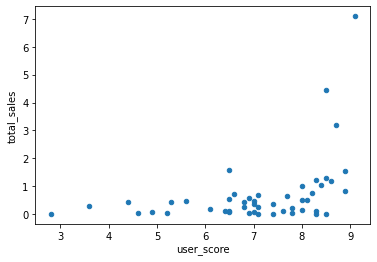

critic_score    0.370201
user_score      0.407926
total_sales     1.000000
Name: total_sales, dtype: float64


In [30]:
best_platform = actual_games.query('platform == "WiiU"')
best_platform.plot(kind='scatter', x='critic_score', y='total_sales')
best_platform.plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
print(best_platform[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

- Отзывы критиков незначительно влияют на продажи игр для **WiiU**, также как и для **PS4**
- Продажи игр для **WiiU** незначительно зависят от оценок пользователей 

### Проанализируем общее распределение игр по жанрам

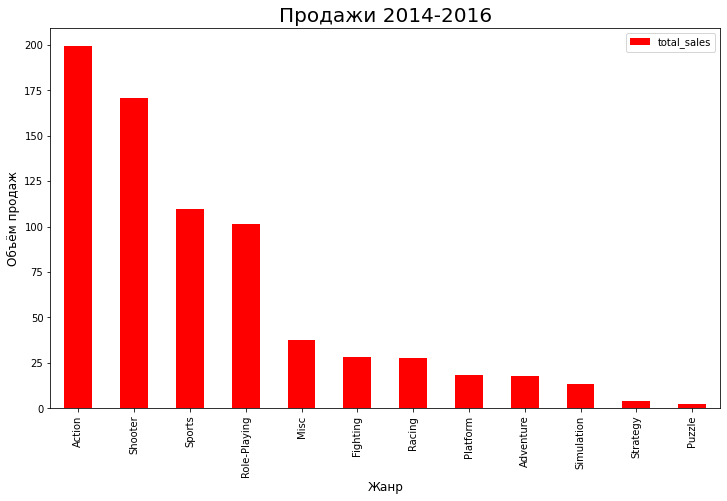

In [31]:
genre_games = actual_games.pivot_table(index='genre',values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_games.plot(kind='bar', figsize=(12,7), color = 'red')
plt.title('Продажи 2014-2016', fontsize=20)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объём продаж', fontsize=12)
plt.show()

Рассмотрим распределение по медианному значению

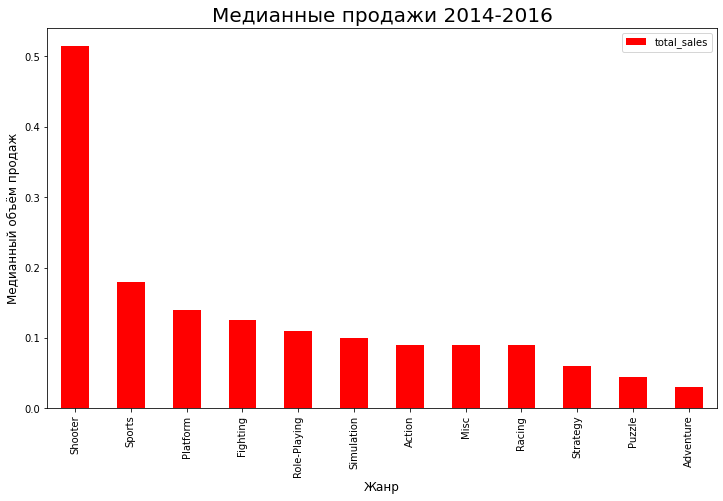

In [32]:
top_profit_genre_median = actual_games.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
top_profit_genre_median.plot(kind='bar', figsize=(12,7), color = 'red')
plt.title('Медианные продажи 2014-2016', fontsize=20)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Медианный объём продаж', fontsize=12)
plt.show()

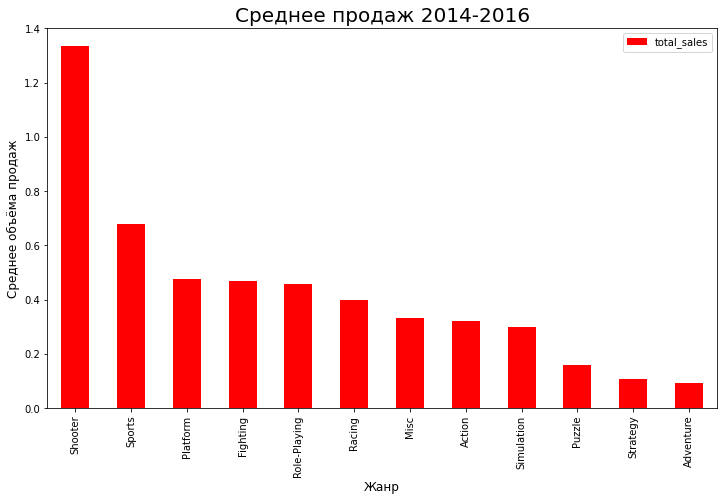

In [33]:
top_profit_genre_mean = actual_games.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)
top_profit_genre_mean.plot(kind='bar', figsize=(12,7), color = 'red')
plt.title('Среднее продаж 2014-2016', fontsize=20)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Среднее объёма продаж', fontsize=12)
plt.show()

- "Ходилки", "стрелялки", спортивные и ролевые игры занимают подавляющее большинство в продажах. Такое распределение возможно связано с   интересами главенствующей возрастной группы потребителей видеоигр(подростки).
- Последние места в продажах занимают пазлы и стратегии. Эти игры нацелены на младший и более зрелый возраст                       соответственно, который не является основным потребителем. 
- Подсчитав среднее и медианное значение, определили ТОП-3 жанра с высоким доходом - это **Shooter**, **Sports** и **Platform**, из которых **Shooter** выделяется, как безусловный лидер.  

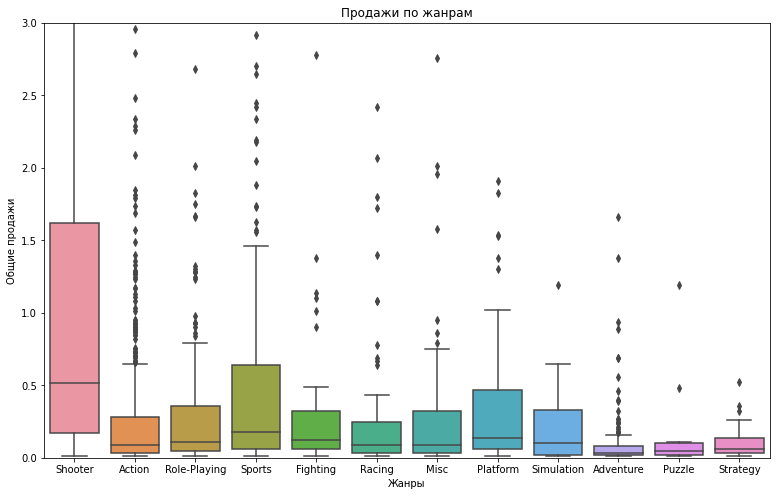

In [63]:
# код ревьюера

plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_games, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

## Составим портрет пользователя каждого региона

### Самые популярные платформы по регионам

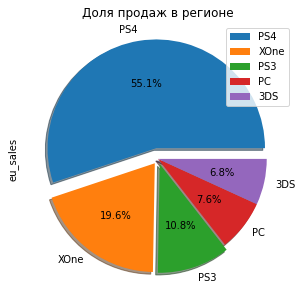

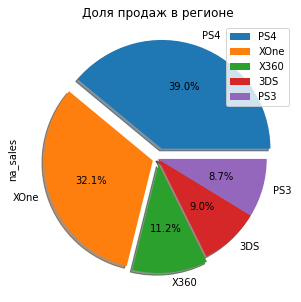

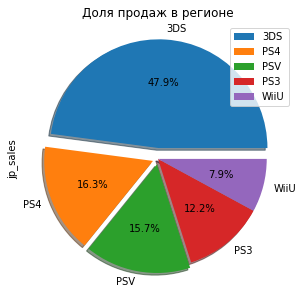

In [34]:
regions = ['eu_sales','na_sales', 'jp_sales']
for i in regions:
    (actual_games.pivot_table(index='platform', values=i, aggfunc='sum').sort_values(by=i, ascending = False).head(5) 
                                .plot(kind='pie', y=i, explode = (0.1, 0.05, 0.05, 0, 0), figsize=(5,5), shadow=True, autopct= '%1.1f%%',
                                      title='Доля продаж в регионе'))
plt.show()

### Самые популярные жанры по регионам

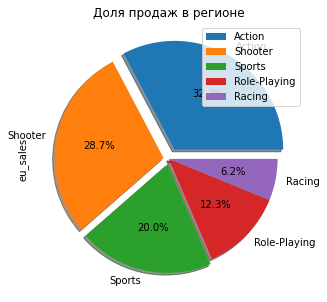

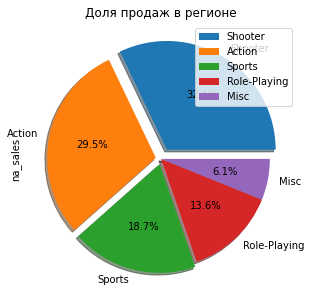

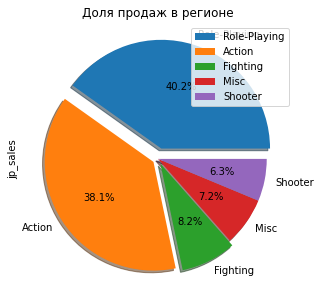

In [35]:
regions = ['eu_sales','na_sales', 'jp_sales']
for i in regions:
    (actual_games.pivot_table(index='genre', values=i, aggfunc='sum').sort_values(by=i, ascending = False).head(5) 
                                .plot(kind='pie', y=i, explode = (0.1, 0.05, 0.05, 0, 0), figsize=(5,5), shadow=True, autopct= '%1.1f%%',
                                      title='Доля продаж в регионе'))
plt.show()

- Европа, Америка и "Другой мир" примерно схожи во вкусах, что скорее всего объясняется влиянием европейской культуры. В Японии же влияние оказала своя древняя история. 

### Проанализируем влияние рейтинга **ESRB** на продажи в регионах 

**Расшифровка рейтингов ESRB:**
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «K-A» («Kids to Adults»)— «Для детей и взрослых»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «RP» ( «Rating Pending»») — «Рейтинг ожидается»
- «Unknown» — «Без возврастного рейтинга»

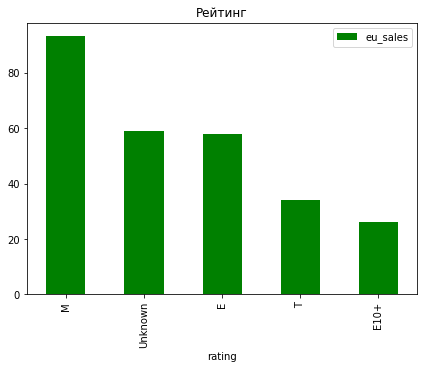

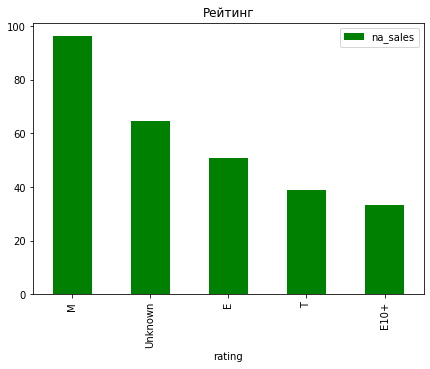

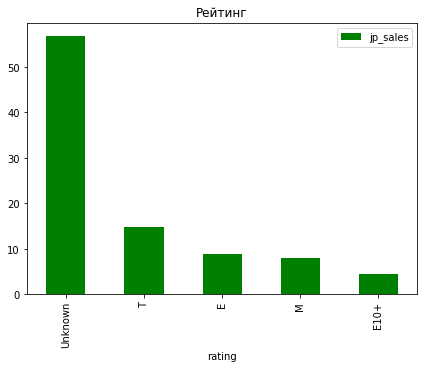

In [36]:
regions = ['eu_sales','na_sales', 'jp_sales']
for i in regions:
    (actual_games.pivot_table(index='rating', values=i, aggfunc='sum').sort_values(by=i, ascending = False).head(5) 
                                .plot(kind='bar', figsize=(7,5), color = 'green', title='Рейтинг'))
plt.show()                              

## Проверим гипотезы

- **Для проверки равенства средних значений в двух выборках будем применять тест Стьюдента**

### Средние пользовательские рейтинги платформ **XOne** и **PC** одинаковые

- H0 - средние пользовательские рейтинги платформ **XOne** и **PC** равны
- Н1 - средние пользовательские рейтинги платформ **XOne** и **PC** неравны
- 5% - критический уровень статистической значимости

In [37]:
actual_games = actual_games.dropna(subset=['user_score'])
alpha = .05
xone_user_score = actual_games.query('platform == "XOne"')['user_score']
pc_user_score = actual_games.query('platform == "PC"')['user_score']


results = st.ttest_ind(xone_user_score, pc_user_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450648637161196
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров **Action** и **Sports** разные

- H0 - средние пользовательские рейтинги жанров **Action** и **Sports** равны
- Н1 - средние пользовательские рейтинги жанров **Action** и **Sports** неравны
- 5% - критический уровень статистической значимости

In [38]:
alpha = .05
action_user_score = actual_games.query('genre == "Action"')['user_score']
sports_user_score = actual_games.query('genre == "Sports"')['user_score']


results = st.ttest_ind(action_user_score, sports_user_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.871148452488903e-19
Отвергаем нулевую гипотезу


## Общий вывод:

В ходе проделанной работы была выполнена предобработка и анализ данных.
- Выявлено влияние отзывов пользователей и критиков на продажи игр платформы **PS4**.
- Рассмотрено общее распределение игр по жанрам.
- Определены самые популярные платформы и жанры по регионам.
- Рассмотрено влияние рейтинга **ESRB** на продажи в регионах.
- Проверены гипотезы о среднепользовательских рейтингах **XOne** и **PC**, **Action** и **Sports**.

В период с 1980 по 1994 год производилось немного игр, в связи с небольшим количеством разработчиков и пользователей. После 1994 пошёл рост производства, который вышел на пики в 2002 и 2008 гг. Спад производства начался в 2012 году, что можно объяснить заменой количества на качество. Разработчики стали объединяться в крупные компании для выхода на новый уровень и создания более реалистичных игр.  

За исследуемый период разные платформы занимали лидирующие позиции в продажах игр, что говорит о постоянной конкуренции между **Sony**, **Microsoft** и **Nintendo**. На 2016 год самыми актуальными платформами являются **PS4**, **X360** и **3DS**.  Платформа и жанр являются определяющими в продаже игр, оценки же пользователей и критиков вторичны. В разных регионах разные запросы: **Action**, **Shooter** и **Sports** в Европе, Америке и "Другом мире" против **Role-Playing**, **Action** и **Fighting** в Японии.	

